In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

from IPython.core.display import display, HTML
from IPython.display import Markdown as md

from matplotlib.ticker import EngFormatter

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def myround(x, base=5):
    return base * round(x/base)
#     return base * (x/base).round()


# Estilo verde-rojito
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0 else 'black'
    if val < 0: color = 'green'
    return 'color: %s' % color

# Estilo gris
def color_gray(val):
    color = '.5'
    return 'color: %s' % color


In [3]:
display(HTML("<style>.rendered_html {font-size: 16px; line-height: 1.8; text-indent: 2rem}</style>"))
# display(HTML("<style>.rendered_html {  }</style>"))

In [4]:
frac = 0.02

In [5]:
yrs_pob_data = 2

In [6]:
aglo_labels = pd.read_csv('./../data/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]

radio_ref = pd.read_csv('./../data/radio_ref.csv')
# radio_ref[['PROV','NOMPROV','DPTO', 'NOMDPTO']].drop_duplicates().to_csv('./../data/DPTO_PROV.csv', index = False)
dpto_region = pd.read_csv('./../data/DPTO_PROV_Region.csv')
radio_ref = radio_ref.merge(dpto_region)
radio_ref = radio_ref[['RADIO_REF_ID', 'NOMDPTO','NOMPROV', 'AGLOMERADO', 'Region']].drop_duplicates().merge(aglo_labels)

data = pd.read_csv('./../data/pobreza'+str(frac)+'.csv', index_col=0)
# data = pd.read_csv('./../data/pobreza'+str(frac)+'_2019.csv', index_col=0)
data = data.merge(radio_ref, on = ['RADIO_REF_ID', 'AGLOMERADO'])
data['AGLO_si'] = data.AGLOMERADO != 0

pob_tot = len(data)/frac/yrs_pob_data
# pob_tot

# Ingresos de hogares, pobreza e indigencia. (Argentina)

Matias Iglesias

matuteiglesias@gmail.com


# Introducción. 

Este reporte presenta estimaciones de ingreso medio de hogares y personas en todo el territorio de la Republica Argentina a partir de la información en la Encuesta Permanente de Hogares (EPH) y el Censo de Población, Hogares y Viviendas de 2010, realizados por el Instituto Nacional de Estadística y Censos (INDEC).

Explotando las variables en común contenidas en ambas fuentes se entrenan algoritmos de clasificación y regresión que predicen los ingresos de muestras sintéticas de la población total consultada en Censo. O sea *machine learning* aplicado al Censo y las encuestas de hogares. Esto permite obtener valores de ingresos, incidencia de pobreza e indigencia y otras variables socioeconómicas segun características demográficas y habitacionales de las provincias, areas metropolitanas, departamentos, partidos, comunas u otras areas censales detalladas.

In [7]:
# from IPython.display import Image
# Image("./mapa_portada.png")

# Contenido
- Incidencia de pobreza e indigencia
- Evolucion semestral

    - Cantidades (miles)
    - Porcentajes

- Ingresos a precios constantes (ARS 2019Q2)
    - Deciles de ingreso
    - Lineas de Pobreza e indigencia

- Dependencia con otras variables
    - Habitaciones de la vivienda
    - Edad
    - Niveles educativos

- Dependencia geografica
    - Variacion regional
    - Por departamento y fraccion censal
    - Por Provincia
    - Por Region y aglomerado
    - Partidos y Comunas del AMBA
    
- Evolucion temporal por areas especificas.

- Lista de Aglomerados

# Incidencia de pobreza e indigencia
## Total Pais

In [8]:
pd.read_csv('./../data/cuadro4_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2]).tail(10).T

Q                                      2018-03-31 2018-06-30 2018-09-30  \
Total pais                                     Si         Si         Si   
CBA          mean   Hogares              15000.00   14900.00   15200.00   
             median Hogares              14100.00   13900.00   14300.00   
CBT          mean   Hogares              37600.00   37600.00   37900.00   
             median Hogares              35400.00   35200.00   35500.00   
Indigencia   mean   Hogares                  5.31       6.01       6.51   
                    Mayores de 24            3.78       4.44       4.77   
                    Personas                 6.94       8.01       8.49   
             sum    Hogares                653.00     739.40     801.30   
                    Personas              2814.40    3251.80    3443.40   
P47T_hogar   mean   Hogares              84400.00   70600.00   76200.00   
             median Hogares              66500.00   56900.00   59700.00   
P47T_persona mean   Mayores de 24        40900.00   34100.00   36800.00   
             median Mayores de 24        31700.00   28400.00   29500.00   
Pobreza      mean   Hogares                 19.30      23.90      22.68   
                    Mayores de 24           16.84      21.45      20.06   
                    Personas                26.36      32.03      30.37   
             sum    Hogares               2374.80    2941.40    2790.80   
                    Personas             10696.00   12996.00   12324.40   
gap          mean   Hogares              46800.00   33100.00   38400.00   
                    Hogares en pobreza  -20800.00  -20100.00  -21300.00   
             median Hogares              31700.00   23300.00   25700.00   
                    Hogares en pobreza  -16400.00  -15800.00  -17200.00   

Q                                      2018-12-31 2019-03-31 2019-06-30  \
Total pais                                     Si         Si         Si   
CBA          mean   Hogares              15700.00   15800.00   15500.00   
             median Hogares              14600.00   14700.00   14400.00   
CBT          mean   Hogares              38900.00   39300.00   38800.00   
             median Hogares              36500.00   36600.00   36100.00   
Indigencia   mean   Hogares                  7.42       7.40       8.02   
                    Mayores de 24            5.61       5.55       6.01   
                    Personas                 9.94       9.97      10.67   
             sum    Hogares                913.00     990.00    1072.90   
                    Personas              4032.60    4409.80    4718.00   
P47T_hogar   mean   Hogares              64200.00   71900.00   61900.00   
             median Hogares              51900.00   56300.00   49200.00   
P47T_persona mean   Mayores de 24        30900.00   35100.00   30300.00   
             median Mayores de 24        26000.00   27300.00   24600.00   
Pobreza      mean   Hogares                 27.67      26.82      29.84   
                    Mayores de 24           25.30      24.19      27.27   
                    Personas                36.57      35.41      39.15   
             sum    Hogares               3405.40    3587.50    3991.40   
                    Personas             14837.30   15654.90   17306.70   
gap          mean   Hogares              25300.00   32700.00   23100.00   
                    Hogares en pobreza  -21400.00  -21800.00  -21300.00   
             median Hogares              16600.00   20800.00   15300.00   
                    Hogares en pobreza  -16900.00  -17200.00  -17200.00   

Q                                      2019-09-30 2019-12-31 2020-03-31  \
Total pais                                     Si         Si         Si   
CBA          mean   Hogares              15500.00   15500.00   16000.00   
             median Hogares              14400.00   14400.00   14900.00   
CBT          mean   Hogares              38700.00   38600.00   38900.00   
             median Hog

In [9]:
# df = pd.read_csv('./../data/cuadro_'+str(frac)+'_Total_pais_Q_n_ARG', index_col=[0, 1], header = [0, 1]).drop_duplicates().unstack(0, 1)
# df.index = pd.to_datetime(df.index)

# df_ = df[['Indigencia', 'Pobreza']].groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
# n = df_.copy()
# n.columns = n.columns.to_period("6M")

# df = pd.read_csv('./../data/cuadro_'+str(frac)+'_Total_pais_Q_pct_ARG', index_col=[0, 1], header = [0, 1]).drop_duplicates().unstack(0, 1)
# df.index = pd.to_datetime(df.index)

# df_ = df[['Indigencia', 'Pobreza']].groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
# pct = df_.copy()
# pct.columns = pct.columns.to_period("6M")


# total_pais = pd.concat([pd.DataFrame(n.iloc[:, -1]),
#                         pd.DataFrame(pct.iloc[:, -1])], axis = 1)
# total_pais.columns = ['Cantidad (miles)', 'Porcentaje']

# x = total_pais
# x.index = x.index.droplevel(2)

cuadro5 = pd.read_csv('./../data/cuadro4_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
df = cuadro5.iloc[:, cuadro5.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro5.columns.get_level_values(2).isin(['Hogares', 'Personas'])]

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.iloc[-1].unstack([3, 1])
x.columns = ['Porcentaje', 'Cantidad (miles)']

# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate().rolling(4).mean()

x.round({'Cantidad (miles)': -2, 'Porcentaje': 1}).sort_index()

Porcentaje  Cantidad (miles)
Indigencia Hogares          8.0            1100.0
           Personas        10.4            4600.0
Pobreza    Hogares         29.8            4000.0
           Personas        39.1           17400.0

In [10]:

md("En el primer trimestre de 2019, la pobreza alcanza el {:.0f}".format(x.loc[('Pobreza', 'Hogares')].Porcentaje)+"% \
   de los hogares, donde viven el {:.0f}".format(x.loc[('Pobreza', 'Personas')].Porcentaje)+"% de las personas ({:.1f}".format(0.001*x.loc[('Pobreza', 'Personas')]['Cantidad (miles)'])+" millones). \
   La indigencia en el mismo periodo alcanza al {:.1f}".format(x.loc[('Indigencia', 'Hogares')].Porcentaje)+"% de los hogares, en donde viven {:.1f}".format(0.001*x.loc[('Indigencia', 'Personas')]['Cantidad (miles)'])+" millones de\
   personas ({:.1f}".format(x.loc[('Indigencia', 'Personas')].Porcentaje)+"%)")
     

En el primer trimestre de 2019, la pobreza alcanza el 30%    de los hogares, donde viven el 39% de las personas (17.4 millones).    La indigencia en el mismo periodo alcanza al 8.0% de los hogares, en donde viven 4.6 millones de   personas (10.4%)

## Evolucion Temporal

In [11]:
# df_.tail()

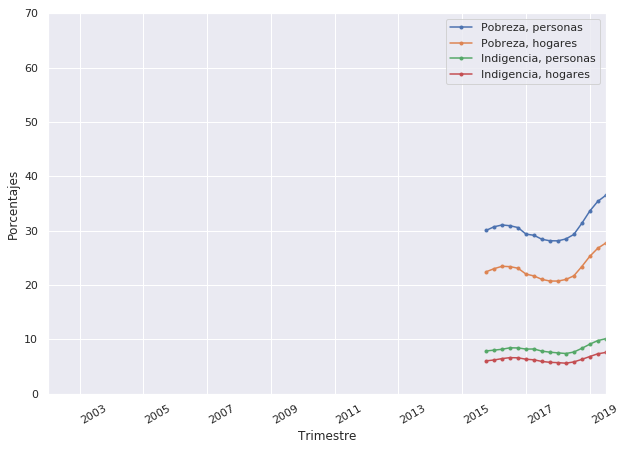

In [12]:
sns.set()

fig, ax = plt.subplots(1, figsize = (10, 7))

# Series
df_ = df.iloc[:, df.columns.get_level_values(1) == 'mean']
df_ = df_.T.reindex(df_.T.sum(1).sort_values(ascending = False).index).T
df_.columns = df_.columns.droplevel([1, 3])
df_.plot(ax = ax, marker = '.')


# df_2 = cuadro3.iloc[:, cuadro3.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
#             & cuadro5.columns.get_level_values(2).isin(['Hogares', 'Personas']) & (cuadro5.columns.get_level_values(1) == 'mean')]
# df_2 = df_2.loc[df_2.index.get_level_values(1) == True]
# # Leave just time as index
# df_2 = df_2.unstack()
# df_2.index = pd.DatetimeIndex(df_2.index)
# df_2.columns = df_2.columns.droplevel([1, 3])
# # Rolling 4 trimestres de interpolado
# df_2 = df_2.resample('Q').mean().interpolate().rolling(4).mean()
# df_2.plot(ax = ax, marker = '.')

# Plot
ax.legend(loc = (1.02,0))
ax.set_ylabel('Porcentajes')
ax.set_ylim(0, 70)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 30, ha="left" )
ax.set_xlim(pd.Timestamp('2002-02-15'), pd.Timestamp('2019-07-01'))
ax.set_xlabel('Trimestre')
ax.legend(['Pobreza, personas', 'Pobreza, hogares', 
           'Indigencia, personas', 'Indigencia, hogares'])

# # ANADIR SERIE CEDLAS
# serie_cedlas = pd.read_csv('./../../data/tornarolli_cedlas.csv', index_col=[0, 1], header = [0, 1])
# serie_cedlas = serie_cedlas.T[serie_cedlas.columns.get_level_values(1) == 'Comparable'].T
# serie_cedlas.columns = serie_cedlas.columns.get_level_values(0)
# serie_cedlas.index = pd.date_range("2003-09", periods=len(serie_cedlas), freq = '6M')
# (1.*serie_cedlas).plot(color = '.6', marker = '+', ax = ax)

plt.show()

Los puntos de este gráfico son los **valores promedios de los últimos 4 trimestres**. Previo a ese cálculo se interpola linealmente para tener los valores de los trimestres 2007-Q3, 2015-Q3, 2015-Q4, y 2016-Q1 para los cuales el INDEC no ofrece bases de microdatos.

En los últimos 15 años hay una tendencia de **descenso** de los niveles de pobreza.

***El dilema de 'Los numeros del INDEC'***

Existe un cuestionamiento de las series de índice de precios ofrecidas por INDEC entre 2007 y 2015. Los cálculos de los niveles de pobreza dependen de los valores en términos reales de las canastas alimentarias.

En este trabajo:
   * Se usan las canastas alimentaria y total regionales establecidas por INDEC desde 2016.
   * Construimos un indice de precios mensual de consenso entre las multiples mediciones disponibles en cada periodo.
   * El valor medio de las canastas de INDEC post 2016, a precios constantes se usa para los años anteriores.
   
De esta forma tenemos una regla fija para los niveles de pobreza en todo el período, **independiente de los índices de precios elaborados por INDEC**.

## Separacion 'aglomerados' vs resto del pais

In [13]:
#md("Los indicadores mas usados en determinar incidencia de pobreza se restringen a los llamados áglomerados urbanos'. La cifra de {:.0f}".format(x.loc[('Pobreza', 'Personas')].Porcentaje)+"% de las personas en pobreza difiere del 32.0% reportado por INDEC para el segundo semestre de 2018 los 33,6% reportados en el informe de UCA para 2018-Q3, principalmente por incluir la poblacion que vive fuera de los aglomerados urbanos.")

***La Encuesta de Hogares no releva zonas rurales***

El INDEC publica en informes semestrales los principales indicadores de pobreza e indigencia. La fuente primaria de información para ellos es la encuesta de hogares EPH. Sin embargo, esta última releva sólamente aglomerados urbanos grandes, dejando en un punto ciego al casi 9% de la poblacion que vive en zona rural, ademas de otro 25% de las personas y hogares que no pertenecen a los aglomerados grandes. 

### Porcentajes
#### Niveles

In [14]:
# df = pd.read_csv('./../data/cuadro_'+str(frac)+'_AGLO_si_Q_pct_ARG', index_col=[0, 1], header = [0, 1]).drop_duplicates().unstack(0, 1)
# df.index = pd.to_datetime(df.index)

# df_ = df[['Indigencia', 'Pobreza']].groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
# df_.index = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in df_.index])
# show = df_.copy()
# show.columns = show.columns.to_period("6M")
# show = show.interpolate(axis = 1)

# show.round(1).style.set_properties(**{'color': 'gray'}, subset=[show.columns[3]])


# # error relativo 0.01

In [15]:
cuadro3 = pd.read_csv('./../data/cuadro2_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
df = cuadro3.iloc[:, cuadro5.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro5.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro5.columns.get_level_values(1).isin(['mean'])]

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.iloc[-1].unstack([3, 1])
x.columns = ['Fuera de aglomerados', 'Aglomerados']

x.round(1)

Fuera de aglomerados  Aglomerados
Indigencia Hogares                    9.5          7.2
           Personas                  12.6          9.1
Pobreza    Hogares                   34.8         27.0
           Personas                  45.4         35.3

***Posible sobreestimacion de pobreza rural***

A la espera de una mejor solución (es decir, que se implemente un muestreo directo de la poblacion fuera de aglomerados), asumimos que ésta es equivalente a la relevada en los centros urbanos. Ciertamente esto puede conllevar a errores sistemáticos. por dar un ejemplo, el nivel educativo en las zonas rurales es significativamente menor. En la ciudad este es un signo de peores condiciones de trabajo e ingresos, pero no necesariamente esto es así en un entorno rural. 

Si nos basamos en niveles educativos podríamos facilmente sobreestimar la pobreza rural, y por lo tanto el total nacional. 
Al presentar los resultados desagregados geograficamente este tema puede salvarse.

In [16]:
startyr = 2015
endyr = 2021


***Serie Temporal***


In [17]:
# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

show = df.groupby(pd.TimeGrouper('Y', level = 0)).mean()
show.columns = show.columns.droplevel(1)
show.index = range(startyr, endyr)

show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])

show.T.round(1)

2015  2016  2017  2018  2019  2020
Indigencia Hogares  Resto         7.9   8.4   7.7   8.4  10.0   9.5
                    Aglomerados   5.0   5.6   4.8   5.2   6.5   6.5
           Personas Resto        10.4  11.0  10.3  11.4  13.6  12.8
                    Aglomerados   6.3   6.9   6.2   6.6   8.5   8.4
Pobreza    Hogares  Resto        27.5  28.2  25.9  29.0  33.8  32.9
                    Aglomerados  19.5  20.2  18.0  20.4  25.3  24.8
           Personas Resto        36.6  37.0  35.0  38.6  44.1  43.2
                    Aglomerados  26.1  26.7  24.3  27.3  33.3  32.6

In [18]:
show = df.diff(4).groupby(pd.TimeGrouper('Y', level = 0)).mean()
show.columns = show.columns.droplevel(1)
show.index = range(startyr, endyr)
show.columns = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in show.columns])


show.T.round(1).style.applymap(color_negative_red)

El ultimo minimo para todas las series de pobreza e indigencia se da en el segundo semestre de 2017.

### Cantidades (miles)
### Niveles

In [19]:
# # Escala crecimiento poblacional para cantidades... No se usa mas porque ahora los archivos ya vienen escalados

# escala = pd.read_csv('./../data/escala_poblacion.csv')
# escala.index = pd.DatetimeIndex(pd.date_range(start = '2010', freq='Y', periods = len(escala))+ pd.DateOffset(days=-184) )
# escala = escala[['r2018']].resample('6M').interpolate().loc['2014':'2018']

In [20]:
# md("En el tercer trimestre de 2018, la pobreza alcanza {:.1f}".format(0.001*x.loc[('Pobreza', 'Personas')]['Cantidad (miles)'])+" millones de personas en todo el pais. \
#    \n\
#    La indigencia en el mismo periodo alcanza {:.1f}".format(0.001*x.loc[('Indigencia', 'Personas')]['Cantidad (miles)'])+" millones de personas\
#    \n\
#    A continuación la desagregacion entre aglomerados y resto del país. ")

In [21]:
# df = pd.read_csv('./../data/cuadro_'+str(frac)+'_AGLO_si_Q_n_ARG', index_col=[0, 1], header = [0, 1]).drop_duplicates().unstack(0, 1)
# df.index = pd.to_datetime(df.index)

# df_ = df[['Indigencia', 'Pobreza']].groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
# df_.index = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in df_.index])
# show = df_.copy()
# show = (show.T*escala.values).T
# show.columns = show.columns.to_period("6M")
# show = show.interpolate(axis = 1)

# myround(show, 20).style.set_properties(**{'color': 'gray'}, subset=[show.columns[3]])


# # Redondear en decenas de miles? al menos..



In [22]:
cuadro3 = pd.read_csv('./../data/cuadro2_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
df = cuadro3.iloc[:, cuadro5.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro5.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro5.columns.get_level_values(1).isin(['sum'])]

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.iloc[-1].unstack([3, 1])
x.columns = ['Fuera de aglomerados', 'Aglomerados']

# myround(x, 20).astype(int)
# Error es 10mil en pobreza hogares, 50mil en pobreza personas


***Serie Temporal***

In [23]:
# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

show = df.groupby(pd.TimeGrouper('Y', level = 0)).mean()
show.columns = show.columns.droplevel(1)
show.index = range(startyr, endyr)

myround(show.T, 20).astype(int)

2015  2016  2017  2018  2019  2020
                    AGLO_si                                    
Indigencia Hogares  False     360   380   320   360   480   460
                    True      400   440   380   420   560   560
           Personas False    1580  1680  1480  1660  2220  2120
                    True     1620  1780  1580  1740  2380  2340
Pobreza    Hogares  False    1220  1260  1100  1240  1640  1600
                    True     1540  1600  1440  1640  2160  2140
           Personas False    5560  5700  5000  5600  7200  7160
                    True     6640  6880  6280  7120  9300  9120

In [24]:
show = df.diff(4).groupby(pd.TimeGrouper('Y', level = 0)).mean()
show.columns = show.columns.droplevel(1)
show.index = range(startyr, endyr)

show.T.round(-1).style.applymap(color_negative_red)

In [25]:
nuevos_pobres = show.iloc[-4:]['Pobreza']['Personas'].sum().sum()
nuevos_indigs = show.iloc[-4:]['Indigencia']['Personas'].sum().sum()

md()
    
"Las estimaciones dan cuenta que en 2019 habrá {:.1f}".format(0.001*nuevos_pobres)+" millones de pobres más que en 2015. \
Además habrá {:.1f}".format(0.001*nuevos_indigs)+" millones de nuevos indigentes. Los niveles de pobreza en 2019 igualan a los de 2008."

'Las estimaciones dan cuenta que en 2019 habrá 3.7 millones de pobres más que en 2015. Además habrá 1.0 millones de nuevos indigentes. Los niveles de pobreza en 2019 igualan a los de 2008.'

## Ingresos a precios constantes (ARS 2019-Q4)

Los valores monetarios reportados son en todos los casos en pesos argentinos (AR$) a valores constantes de 2019-Q4.

### Percentiles de ingreso
(Personas mayores de 24)

In [26]:
# #JIC

# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

# import numpy as np

# from IPython.display import Markdown as md

# import numpy as np
# from matplotlib.ticker import EngFormatter

# data = pd.read_csv('./../data/pobreza'+str(frac)+'.csv', index_col=0)
# data.nunique()

In [27]:
# import numpy as np
# s, bins_persona = pd.qcut(data.loc[data.P03 > 24].P47T_persona, 9, retbins=True, duplicates = 'drop')
# s, bins_hogares = pd.qcut(data.groupby('HOGAR_REF_ID').first().P47T_hogar, 9, retbins=True)
# df = pd.DataFrame([bins_persona[1:-1], bins_hogares[1:-1]], index = ['Ingreso Persona', 'Ingreso Hogar']).T
# # df.index = np.array([ 1, 2,  3,  4,  'mediana', 6,  7,  8,  9])
# # myround(df, 250).astype(int)
# df
# # Error +- 300 pe

In [28]:
def plot_dist(data, variable = 'P47T_hogar', xmin = 0, titulo = 'Title'):
    fig, ax = plt.subplots(1, figsize = (13, 6))

    no_pobres_hist = np.repeat(data.loc[data.Pobreza == False][['HOGAR_REF_ID', variable]].drop_duplicates()[variable].values, 1/frac/yrs_pob_data)
    pobres_hist = np.repeat(data.loc[(data.Pobreza) & (~data.Indigencia)][['HOGAR_REF_ID', variable]].drop_duplicates()[variable].values, 1/frac/yrs_pob_data)
    indig_hist = np.repeat(data.loc[data.Indigencia][['HOGAR_REF_ID', variable]].drop_duplicates()[variable].values, 1/frac/yrs_pob_data)
    hist_data = [indig_hist, pobres_hist, no_pobres_hist]
    plt.hist(hist_data, np.arange(xmin, 250000, 5000), stacked=True, alpha = .5)
    
    ax.legend(['Indigentes', 'Pobres no indigentes', 'No pobres'])
    ax.axvline(0, c = 'k')
    ax.yaxis.set_major_formatter(EngFormatter())

    plt.xlim(xmin, 250000)
    plt.ylim(0, 1e6)
    # plt.yscale('log')
    plt.ylabel('Cantidad \n total nacional por bin de AR$ 5000')
    plt.xlabel(titulo)

    plt.show()

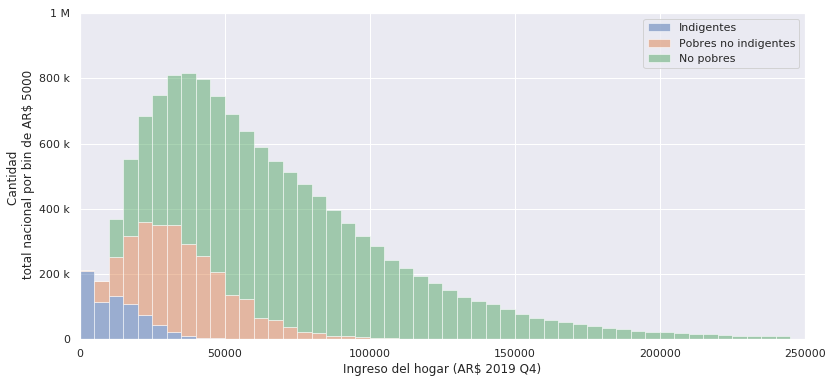

In [29]:
import numpy as np
from matplotlib.ticker import EngFormatter

plot_dist(data.groupby('HOGAR_REF_ID').first().reset_index(), variable = 'P47T_hogar', xmin = 0, 
          titulo = 'Ingreso del hogar (AR$ 2019 Q4)')

# plot_dist(data.loc[(data['P03'] > 24) & (data['P03'] > 34)], variable = 'P47T_persona', xmin = 0, 
#           titulo = 'Ingreso del hogar (AR$ 2019 Q4)')

## Lineas de Pobreza e indigencia

#### Total Pais

In [30]:
from IPython.display import display, HTML
# def pretty_print(df):
#     return display(HTML(df.to_html().replace("\\n","<br>")))

def pd_centered(df):
    return df.style.set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "center")]}])

In [31]:
# tabla_semestral = pd.read_csv('./../data/tabla_semestral.csv', index_col=0, header = [0, 1])
# table = tabla_semestral.drop(['PERSONA_REF_ID', 'CBA','CBT'], axis = 1)
# table = table.iloc[:, table.columns.get_level_values(1) != 'sum']
# table.index = pd.to_datetime(table.index, infer_datetime_format=True)
# table.index = table.index.to_period("6M")

# table[('Pobreza', 'mean')] = 100*table[('Pobreza', 'mean')]
# table[('Indigencia', 'mean')] = 100*table[('Indigencia', 'mean')]

# table.columns = pd.Index([('Ingreso Persona', 'promedio'), ('Ingreso Persona', 'mediana'),
#                 ('Ingreso Hogar', 'promedio'), ('Ingreso Hogar', 'mediana'),
#                 ('Ingreso Hogar sobre linea de pobreza', 'promedio'), ('Ingreso Hogar sobre linea de pobreza', 'mediana'),
#                 ('Pobreza (personas)', '%'), ('Indigencia (personas)', '%')])

# pd_centered(table.round({('Ingreso Persona', 'promedio'): -2, ('Ingreso Persona', 'mediana'): -2,
#                 ('Ingreso Hogar', 'promedio'): -2, ('Ingreso Hogar', 'mediana'): -2,
#                 ('Ingreso Hogar sobre linea de pobreza', 'promedio'): -2, ('Ingreso Hogar sobre linea de pobreza', 'mediana'): -2,
#                 ('Pobreza (personas)', '%'): 1, ('Indigencia (personas)', '%'): 1}))

\* En este cuadro, el calculo de ingresos medios incluye a toda la poblacion, tambien menores e inactivos.



## 'Linea de Pobreza'

Para este paso, se aplican la regla sugerida por INDEC de pobreza monetaria. 

**De donde sale***

Involucra usar un numero cercano a 2.5 que viene de la encuesta de Gastos de Hogares (ENGHO).
Es decir, esta es una linea de ~2.5 Canastas alimentarias. Este es un punto crucial ya que afecta el numerito final de resultado que vamos a tener. Los valores precisos van a estar en el apendix pero seria bueno tambien un calculo menos vulnerable al control. 
La canasta alimentaria al poder ser biologicamente establecida y con algunos estimadores economicos sencillos (cuanto cuesta comer lo necesario) es mas transparente. Tambien se presta a ser comparada en reglas internacionales, es decir sugerencias de valores PPP que representan un nivel medido de alimentacion.

***Como se calcula***
 - Se usan los 10 trimestres disponibles para entrenar. 
 - Los resultados del algoritmo de prediccion son ingresos de personas y hogares.
 - Nos permite predecir un output complicado, como puede ser una condicion en la ecuacion del hogar.
 - Aprovechamos que los ponderamientos se pueden lograr sampleando al azar de una muestra comprensiva (Censo 2010).
 - Se usan las proyecciones poblacionales por departamento (INDEC)
 - Todos los valores en pesos de 2019-Q4. Conviene deflactar mensualmente. 
 - Se usa promedio simple. En alta inflacion da cierto bias. Aunque igualmente, tambien nosotros perdemos idea de cuanto valia el peso en ese momento.
 
 

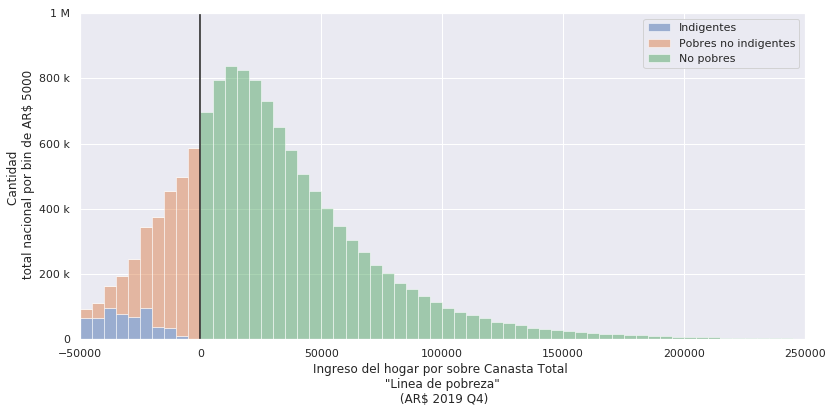

In [32]:
plot_dist(data, variable = 'gap_pobreza', xmin = -50000,
          titulo = 'Ingreso del hogar por sobre Canasta Total \n "Linea de pobreza" \n (AR$ 2019 Q4)')

***La linea de la canasta alimentaria***

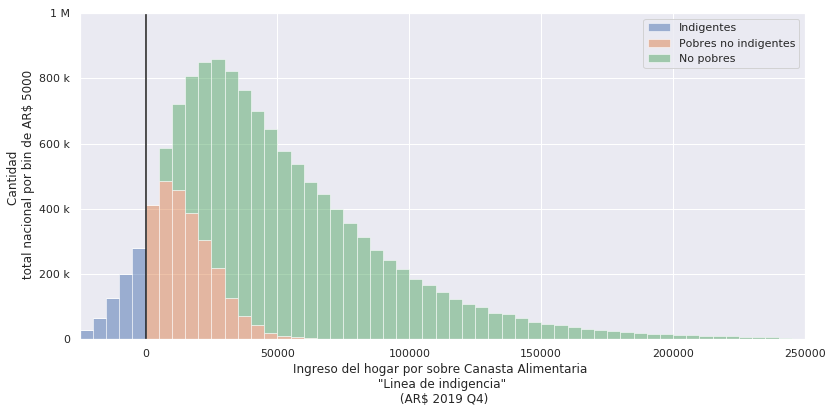

In [33]:
plot_dist(data, variable = 'gap_indigencia', xmin = -25000,
          titulo = 'Ingreso del hogar por sobre Canasta Alimentaria \n "Linea de indigencia" \n (AR$ 2019 Q4)')



Una vez que se hacen predicciones de ingresos y se calcula la 'Canasta Basica Alimentaria' de las personas de los hogares, calculamos la ecuacion en cada uno de los hogares y agregamos los resultados.

Esto nos deja ver una estructura detallada de la población de hogares que no llega pagar la canasta básica alimentaria de sus integrantes.

#### Canastas alimentaria y total, vs ingreso medio individual y de hogar.

Precios constantes de 2019-Q4. Los costos de canastas definidos post intervencion de 2016 se extienden hacia atras hasta 2003 para todos los calculos de pobreza.

In [34]:
# tabla_semestral_AGLOS = pd.read_csv('./../data/tabla_semestral_AGLOS.csv', index_col=0, header = [0, 1])
# table = tabla_semestral_AGLOS.drop(['PERSONA_REF_ID', 'CBA','CBT'], axis = 1)
# table = table.iloc[:, table.columns.get_level_values(1) != 'sum']
# table.index = pd.to_datetime(table.index, infer_datetime_format=True)
# table.index = table.index.to_period("6M")

# table[('Pobreza', 'mean')] = 100*table[('Pobreza', 'mean')]
# table[('Indigencia', 'mean')] = 100*table[('Indigencia', 'mean')]

# table.columns = pd.Index([('Ingreso Persona', 'promedio'), ('Ingreso Persona', 'mediana'),
#                 ('Ingreso Hogar', 'promedio'), ('Ingreso Hogar', 'mediana'),
#                 ('Ingreso Hogar sobre linea de pobreza', 'promedio'), ('Ingreso Hogar sobre linea de pobreza', 'mediana'),
#                 ('Pobreza (personas)', '%'), ('Indigencia (personas)', '%')])

# pd_centered(table.round({('Ingreso Persona', 'promedio'): -2, ('Ingreso Persona', 'mediana'): -2,
#                 ('Ingreso Hogar', 'promedio'): -2, ('Ingreso Hogar', 'mediana'): -2,
#                 ('Ingreso Hogar sobre linea de pobreza', 'promedio'): -2, ('Ingreso Hogar sobre linea de pobreza', 'mediana'): -2,
#                 ('Pobreza (personas)', '%'): 1, ('Indigencia (personas)', '%'): 1}))

In [35]:
cuadro5 = pd.read_csv('./../data/cuadro4_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
df = cuadro5.iloc[:, cuadro5.columns.get_level_values(0).isin(['CBA', 'CBT', 'P47T_hogar', 'P47T_persona', 'gap', ])
                 & cuadro5.columns.get_level_values(1).isin(['median', ])]

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

show = df.groupby(pd.TimeGrouper('Y', level = 0)).mean()
show.columns = show.columns.droplevel([1, 3])
show.columns = [('Canasta basica', 'alimentaria'), ('Canasta basica', 'total'), 
                ('Ingreso medio', 'hogar'), ('Ingreso medio', 'persona'),
                ('Brecha de hogares', 'todos'), ('Brecha de hogares', 'en pobreza')]
show.index = range(startyr, endyr)

# pd_centered(myround(show, 100).astype(int))

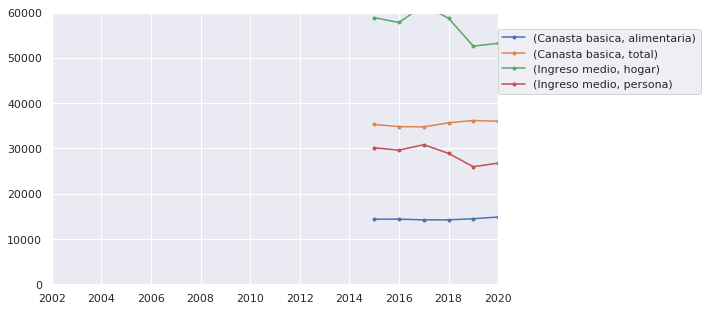

In [36]:
fig, ax = plt.subplots(figsize = (8, 5))
show.iloc[:, :4].plot(ax = ax, marker = '.')
plt.ylim(0, 6e4)
plt.xlim(2002, 2020)
ax.legend(loc = (1, .7))
plt.show()

## Variacion regional

In [37]:
# #JIC

# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

# import numpy as np

# from IPython.display import Markdown as md

# import numpy as np
# from matplotlib.ticker import EngFormatter

data = pd.read_csv('./../data/pobreza'+str(frac)+'.csv', index_col=0)
# data = pd.read_csv('./../data/pobreza'+str(frac)+'_2019.csv', index_col=0)

# data.nunique()

aglo_labels = pd.read_csv('./../data/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
radio_ref = pd.read_csv('./../data/radio_ref.csv').merge(aglo_labels)
dpto_region = pd.read_csv('./../data/DPTO_PROV_Region.csv')
radio_ref = radio_ref.merge(dpto_region)

In [38]:
data['NOMPROV'].nunique()

24

In [39]:
### Matriz que da origen a las barritas de abajo.

data_hogares = data.groupby('HOGAR_REF_ID').first()
data_hogares = data_hogares.merge(radio_ref[['RADIO_REF_ID', 'Region', 'NOMPROV', 'NOMAGLO']].drop_duplicates())
data_hogares['Region'] = data_hogares['Region'].str.replace('Gran Buenos Aires', 'AMBA')
data_hogares['pctil'], bins_hogares = pd.qcut(data_hogares.P47T_hogar, 15, retbins=True)

df = data_hogares.groupby(['Region', 'pctil'])[['P47T_hogar']].count().unstack()
# df = df.div(df.sum(1), 0)#.round(3)

df_CABA = data_hogares.groupby(['NOMPROV', 'pctil'])[['P47T_hogar']].count().unstack().loc[['Ciudad Autónoma de Buenos Aires']]
# df_CABA = df_CABA.div(df_CABA.sum(1), 0)

df_GBA = data_hogares.groupby(['NOMAGLO', 'pctil'])[['P47T_hogar']].count().unstack().loc[['GBA']]
# df_GBA = df_GBA.div(df_GBA.sum(1), 0)

df = pd.concat([df_CABA, df_GBA, df])

df = df.reindex(['Noroeste', 'Noreste','Ciudad Autónoma de Buenos Aires', 'GBA', 'Cuyo', 'Pampeana', 'Patagónica'])

In [40]:
yrs_pob_data = 2

In [41]:
tot_reg = data_hogares.groupby('Region').count().iloc[:, 0]/frac/yrs_pob_data
totprovs = data_hogares.groupby('NOMPROV').count().iloc[:, 0]/frac/yrs_pob_data
totaglos = data_hogares.groupby('NOMAGLO').count().iloc[:, 0]/frac/yrs_pob_data

tot_hogares = pd.concat([tot_reg, totprovs, totaglos])

In [42]:
# Preparar gdf de pobreza por provincias

import geopandas as gpd
dptos_gdf = gpd.read_file('./../../../../../../../home/miglesia/Documents/censo_geo/pxdptodatosok.shp').drop([439])
dptos_gdf.crs = {'init': 'epsg:4326'} #latlong
dptos_gdf = dptos_gdf.to_crs({'init': 'epsg:3395'}) #lo dejamos en metrico

In [43]:
# dptos_gdf[['codpcia', 'provincia']].nunique()

In [44]:
provs_gdf = dptos_gdf[['codpcia', 'geometry']].dissolve('codpcia')
provs_gdf.index = provs_gdf.index.astype(int)

pob_prov = data.groupby('PROV')[['Pobreza']].mean()
ingreso_mediano = data.loc[data.P03 > 24].groupby('PROV')[['P47T_persona', 'P47T_hogar']].median()
nomprovs = radio_ref[['PROV', 'NOMPROV', 'Region']].drop_duplicates().set_index('PROV')

provs_gdf = gpd.GeoDataFrame(pd.concat([nomprovs, ingreso_mediano, pob_prov, provs_gdf], axis = 1))

fancy_crs = {u'lat_0': -35,
 u'lon_0': -65,
 u'no_defs': True,
 u'proj': u'ortho',
 u'units': u'm',
 u'x_0': -65,
 u'y_0': -35,
 u'a' : 6371000, 
 u'b' : 6371000}
provs_gdf.crs = {'init': 'epsg:3395'}
provs_gdf = provs_gdf.to_crs({'init': 'epsg:4326'})
provs_gdf = provs_gdf.to_crs(fancy_crs)

In [45]:
# gpd.GeoDataFrame(pd.concat([nomprovs, ingreso_mediano, pob_prov, provs_gdf], axis = 1))
# pob_prov

El cuadro de deciles de ingreso muestra valores nacionales. Sin embargo ¿Cómo se distribuyen las poblaciones regionales entre estos grupos de ingreso?


In [46]:
def myround(x, base=5):
    return base * round(x/base)
#     return base * (x/base).round()

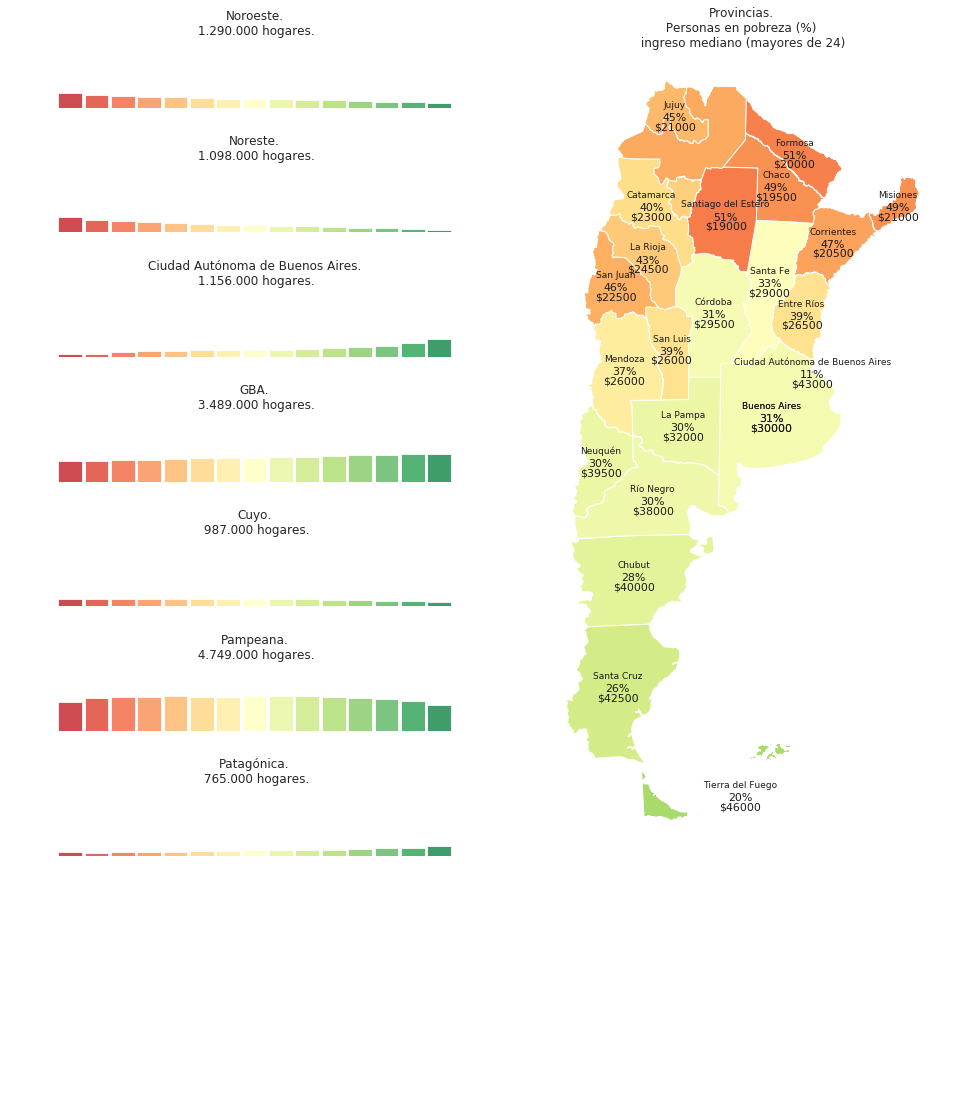

In [47]:
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize = (16, 15))
spec = gridspec.GridSpec(ncols=2, nrows=len(df), figure=fig)

for i in range(len(df)):
#     ax = axs[i]
    ax = fig.add_subplot(spec[i, 0])
    (df.iloc[i]/yrs_pob_data).plot(kind = 'bar', ax = ax, width = .9, color = sns.color_palette("RdYlGn", 15), alpha = .8)# colormap = 'RdYlGn')
    lugar = df.index[i]
    ax.set_title(lugar + '.\n '+str('{:,}'.format(int(np.round(tot_hogares.loc[lugar], -3))).replace(',', '.'))+' hogares.')
    ax.set_xlabel('Percentiles nacionales de ingreso', fontsize = 10)
    ax.set_ylim(0, 13000)
    ax.axis('off')
    plt.subplots_adjust(hspace = 0.85)
    

ax = fig.add_subplot(spec[:, 1])
# provs_gdf.plot(column = 'P47T_persona', ax = ax, vmin = 10000, vmax = 35000, cmap = 'RdYlGn')
provs_gdf.plot(column = 'Pobreza', ax = ax, vmin = 0, vmax = .66, cmap = 'RdYlGn_r')

# Encuadre ARG
# ax.set_xlim(-8300000, -5750000)
# ax.set_ylim(-7450000, -2400000)
ax.set_xlim(-.75e6, 1.25e6)
ax.set_ylim(-2.3e6, 1.6e6)

# ax.set_xlabel('A')
ax.axis('off')

for i, row in provs_gdf.fillna(0).drop([90, 66]).iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ingreso_mediano = '$'+str(int(myround(row.P47T_persona,500)))
#     ingreso_mediano = '$'#+str(row.P47T_persona,500)
    pobreza = str(int(round(100*row.Pobreza)))+'%'
#     ax.scatter(x, y, marker='x', color='red')
    ax.text(x, y + 40000, row.NOMPROV, fontsize=9, color = '.1', horizontalalignment = 'center')
    ax.text(x, y - 25000, pobreza, fontsize=11, color = '.1', horizontalalignment = 'center')
    ax.text(x, y - 70000, ingreso_mediano, fontsize=11, color = '.1', horizontalalignment = 'center')


# # regs_gdf.plot(color = 'None', edgecolor = 'k', ax = ax) Revisar
plt.title('Provincias.\n Personas en pobreza (%) \n ingreso mediano (mayores de 24)')
plt.show()

# fig.colorbar(im, ax=ax, orientation="horizontal")
# divider = make_axes_locatable(ax)
# cax = divider.new_vertical(size="5%", pad=0.7, pack_start=True)
# fig.add_axes(cax)
# fig.colorbar(im, cax=cax, orientation="horizontal")

# El error en ingreso medio por provincia esta en los 500 a 1000 pe
# En la cifra de pobreza el error es de 1%

In [48]:
import geopandas as gpd
dptos_gdf = gpd.read_file('./../../../../../../../home/miglesia/Documents/censo_geo/pxdptodatosok.shp').drop([439])
dptos_gdf['personas'] = pd.to_numeric(dptos_gdf['personas'])

data['link'] = data['DPTO'].astype(str).str.zfill(5)

pob_dpto = data.groupby('link')[['Pobreza']].mean().reset_index()

pob_dpto_gdf = gpd.GeoDataFrame(pob_dpto.merge(dptos_gdf))
# data.groupby('DPTO').count().iloc[:, 0].sort_values(ascending = False).head(10)

# pob_dpto_gdf.loc[pob_dpto_gdf.personas < 3000, 'Pobreza'] = np.nan
# pob_dpto_gdf = pob_dpto_gdf.fillna(pob_dpto_gdf.Pobreza.median())
# gdf = pob_dpto_gdf#.plot(column = 'Pobreza')

# fig, ax = plt.subplots(1, figsize = (6, 14))
# gdf.crs = {'init': 'epsg:4326'}
# gdf.to_crs({'init': 'epsg:3395'}).fillna(0).plot(column = 'Pobreza', ax = ax, vmin = -.1, vmax = .66, cmap = 'RdYlGn_r')
# plt.axis('off')
# plt.show()

## Tamaño de la vivienda. Hacinamiento.

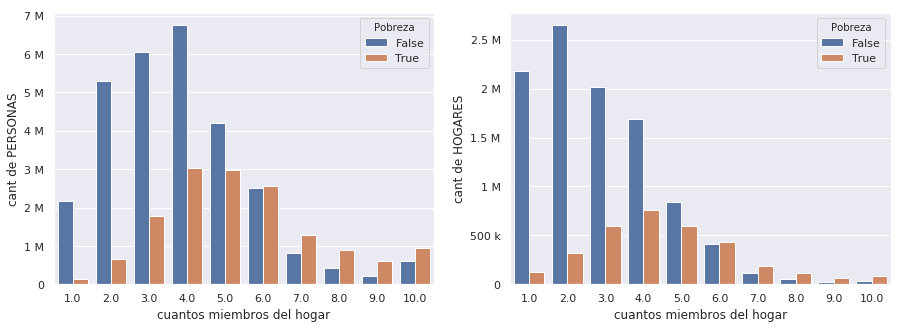

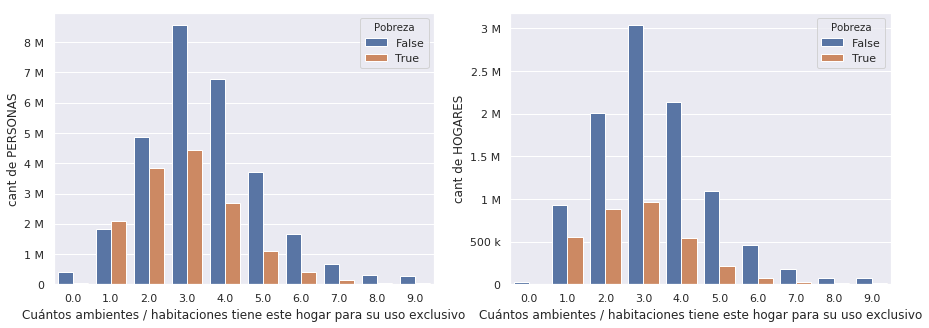

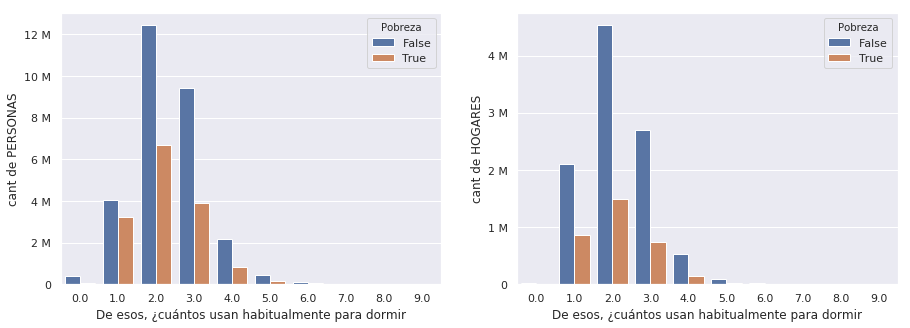

In [49]:

data = pd.read_csv('./../data/pobreza'+str(frac)+'.csv', index_col=0)
# data = pd.read_csv('./../data/pobreza'+str(frac)+'_2019.csv', index_col=0)


import numpy as np
from matplotlib.ticker import EngFormatter
# cat_cols = ['V01', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10',
#        'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'PROP',
#        'P02', 'P05', 'P07', 'P08', 'P09', 'P10', 'CAT_OCUP',
#        'CAT_INAC', 'CH07', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59',
#        'PP07H', 'PP07I', 'PP07J', 'PP07K',
#        'AGLOMERADO', 'CONDACT', 'Grupo Etario'] # IX_TOT
# value_cols = 'P47T' #?

data['IX_TOT'] = np.clip(data.IX_TOT, 0, 10)
data['H15'] = np.clip(data.H15, 0, 9)

cat_cols = ['IX_TOT', 'H16', 'H15']

vn = pd.read_csv('./../data/VARIABLE_NAMES.csv')
# vn['Pregunta'] = vn['Pregunta'].str.strip()#.str.replace("'", "") Don't run
# data = data.reset_index().rename(columns = {'index': 'PERSONA_REF_ID'}) # parche porque no esta la columna

for cat in cat_cols:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
    info = data.groupby([cat, 'Pobreza'])[['PERSONA_REF_ID', 'HOGAR_REF_ID']].nunique()
    info_pct = (100*(info.unstack()/info.unstack().sum()).stack())
    
    sns.barplot(x=cat, y="PERSONA_REF_ID", hue="Pobreza", data=(info/frac/yrs_pob_data).reset_index(), ax = ax1)
    xlab = ''
    try:
        xlab = vn.loc[vn.Censo == cat]['Pregunta'].values[0]
    except:
        try:
            xlab = vn.loc[vn.EPH == cat]['Pregunta'].values[0]
        except:
            pass
    ax1.set(xlabel= xlab, ylabel = 'cant de PERSONAS')
    ax1.yaxis.set_major_formatter(EngFormatter())
    sns.barplot(x=cat, y="HOGAR_REF_ID", hue="Pobreza", data=(info/frac/yrs_pob_data).reset_index(), ax = ax2)
    ax2.set(xlabel= xlab, ylabel = 'cant de HOGARES')
    ax2.yaxis.set_major_formatter(EngFormatter())
    plt.show()

## Pobreza por grupo etario

In [50]:
# pd.cut(data.P03)

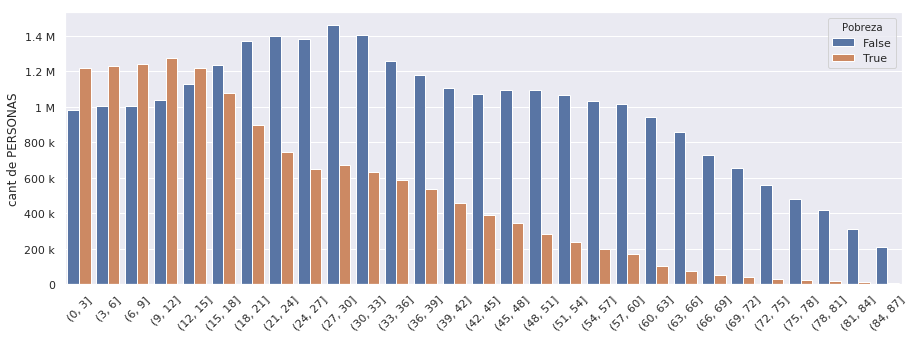

In [51]:
data['Grupo Etario'] = pd.cut(data.P03, np.arange(0, 90, 3))

cat = 'Grupo Etario'

vn = pd.read_csv('./../data/VARIABLE_NAMES.csv')
# vn['Pregunta'] = vn['Pregunta'].str.strip()#.str.replace("'", "") Don't run

fig, ax = plt.subplots(1, figsize = (15, 5))
info = data.groupby([cat, 'Pobreza'])[['PERSONA_REF_ID']].nunique()
sns.barplot(x=cat, y="PERSONA_REF_ID", hue="Pobreza", data=(info/frac/yrs_pob_data).reset_index(), ax = ax)
xlab = ''
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(EngFormatter())
ax.set(xlabel= xlab, ylabel = 'cant de PERSONAS')
plt.show()

In [52]:
# ## Upper tail

# data['income_bin'] = pd.cut(np.log10(data['P47T_persona']).replace(-np.inf, 1), 100)

# fig, ax = plt.subplots(1, figsize = (5, 6))

# pdf_info = data.groupby('income_bin')['PERSONA_REF_ID'].count().reset_index()
# pdf_info['PERSONA_REF_ID'] = pdf_info['PERSONA_REF_ID']/frac/yrs_pob_data

# pdf_info['pdf'] = pdf_info['PERSONA_REF_ID']/pdf_info['PERSONA_REF_ID'].sum()
# pdf_info['cdf'] = pdf_info['pdf'].cumsum()

# np.log10(1 - pdf_info.iloc[60:85].set_index('income_bin')[['cdf']]).reset_index().plot(x = 'income_bin', y = 'cdf', marker = '.', ax = ax)
# ax.tick_params(axis='x', rotation=45)

# pdf_info.tail(20)

## Ingresos, pobreza e indigencia por niveles educativos

En este cuadro, los ingresos medios, porcentaje de pobreza e indigencia segun nivel educativo.

In [53]:
cuadro = pd.read_csv('./../data/cuadro3_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
cuadro = cuadro.loc['2003':].drop(('P47T_persona', 'mean', 'Mayores de 24'), axis = 1)
cuadro.columns = ['Indigencia (%)', 'Ingresos (mediana)', 'Pobreza (%)']
cuadro = cuadro.unstack().mean().unstack().T

cuadro = cuadro[['Ingresos (mediana)', 'Pobreza (%)', 'Indigencia (%)']]
cuadro = cuadro.loc[[2, 20, 21, 40, 41, 60, 61, 70, 71, 80, 81]]

cuadro

data_sel = data[['P03','P0910']]
counts = data_sel.loc[data_sel.P03 > 24]['P0910'].value_counts()
counts_pct = (100*counts.loc[[2, 20, 21, 40, 41, 60, 61, 70, 71, 80, 81]]/counts.sum()).round(1)

cuadro = pd.concat([cuadro, counts_pct], axis = 1)
cuadro = cuadro.rename(columns = {'P0910':'Poblacion (%)'})
cuadro.index = ['No asistió', 'Primaria', 'P. completa', 'Secundaria','S. completa', 'Terciario', 'T. completo', 
             'Universidad', 'U. completa', 'Postgrado', 'P. completo']

cuadro = cuadro.round({'Ingresos (mediana)': -2, 'Pobreza (%)': 1, 'Indigencia (%)': 1, 'Poblacion (%)': 1})
cuadro.style.bar(subset = ['Poblacion (%)'], vmin = 0)

,Ingresos (mediana),Pobreza (%),Indigencia (%),Poblacion (%)
No asistió,18200,29.8,7.1,2.2
Primaria,19200,30.8,8.1,13.2
P. completa,21800,28,6.6,27.6
Secundaria,26000,27.8,6.1,13.8
S. completa,33400,17.1,3.2,19.6
Terciario,34400,15.5,3.3,2.9
T. completo,42900,7.7,1.3,6.4
Universidad,39100,9.8,2.1,5.9
U. completa,58800,3.8,0.8,6.9
Postgrado,57700,4.1,1.1,0.3


*Mayores de 24 años

## Dependencia geografica
### Porcentaje de personas en pobreza por departamento.

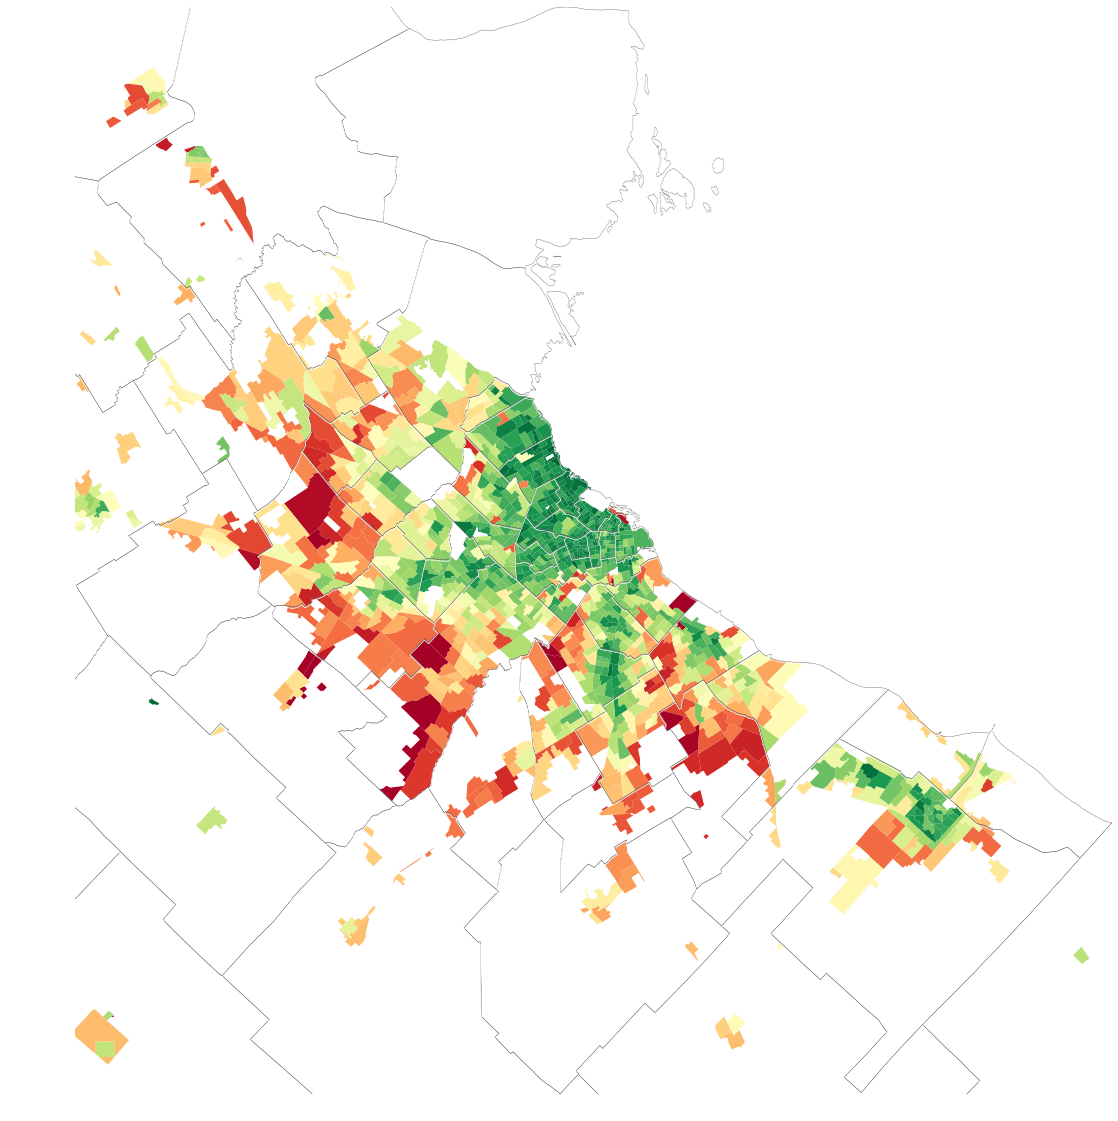

In [54]:
pob_frac = data.loc[data.PROV.isin([2, 6, 2])].groupby(['IDFRAC','DPTO'])[['Pobreza']].mean().reset_index()
# pob_frac = data.loc[data.AGLOMERADO.isin([32])].groupby(['IDFRAC','DPTO'])[['Pobreza']].mean().reset_index()
# pob_frac = data.loc[data.PROV.isin([82])].groupby(['IDFRAC','DPTO'])[['Pobreza']].mean().reset_index()
# pob_frac = data.loc[data.AGLOMERADO.isin([25])].groupby(['IDFRAC','DPTO'])[['Pobreza']].mean().reset_index()

frac_gdf = gpd.read_file('./../../../../../../../home/miglesia/Documents/censo_geo/pxfracdatosok.shp', )

pob_gdf = gpd.GeoDataFrame(pob_frac.merge(frac_gdf), crs = {'init': 'epsg:4326'})
# frac_gdf['personas'] = pd.to_numeric(frac_gdf['personas'])

# Fill na with median. Esp for areas of little pop.
# # data.groupby('DPTO').count().iloc[:, 0].sort_values(ascending = False).head(10)
# pob_gdf.loc[pob_gdf.personas < 3000, 'Pobreza'] = np.nan
# pob_gdf = pob_gdf.fillna(pob_dpto_gdf.Pobreza.median())

gdf = pob_gdf#.plot(column = 'Pobreza')

fig, ax = plt.subplots(1, figsize = (25, 20))
dptos_gdf.loc[dptos_gdf.codpcia.isin(['02', '06'])].to_crs({'init': 'epsg:3395'}).translate(yoff = 220, xoff = 30).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
dptos_gdf.loc[dptos_gdf.codpcia.isin(['02', '06'])].to_crs({'init': 'epsg:3395'}).translate(yoff = 0, xoff = 0).plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)
gdf.fillna(0).to_crs({'init': 'epsg:3395'}).plot(column = 'Pobreza', ax = ax, vmin = 0, vmax = .6, cmap = 'RdYlGn_r', lw = 0)
plt.axis('off')
# x1, y1, x2, y2 = tuple(gdf.fillna(0).to_crs({'init': 'epsg:3395'}).total_bounds)
x1, y1, x2, y2 = (-6583053, -4171597, -6424188, -4005023)
plt.xlim(x1, x2)
plt.ylim(y1, y2)

ejido = gpd.read_file('./../../../../../../../home/miglesia/Documents/censo_geo/ejidos/ejido_BA', driver='GeoJSON')
ejido.loc[[1]].to_crs({'init': 'epsg:3395'}).plot(color = 'w', ax = ax)
ejido
plt.savefig("./mapa_portada.png")
plt.show()

In [55]:
import geopandas as gpd
dptos_gdf = gpd.read_file('./../../../../../../../home/miglesia/Documents/censo_geo/pxdptodatosok.shp')
dptos_gdf.crs = {'init': 'epsg:4326'} #latlong
# dptos_gdf = dptos_gdf.to_crs({'init': 'epsg:3395'}) #lo dejamos en metrico
dptos_gdf['personas'] = pd.to_numeric(dptos_gdf['personas'])
dptos_gdf = dptos_gdf.to_crs(fancy_crs)

data['link'] = data['DPTO'].astype(str).str.zfill(5)
pob_dpto = data.groupby('link')[['Pobreza']].mean().reset_index()

pob_dpto['link'] = pob_dpto.link.astype(float).astype(int).astype(str).str.zfill(5)
pob_dpto_gdf = gpd.GeoDataFrame(pob_dpto.merge(dptos_gdf), crs = fancy_crs)
# data.groupby('DPTO').count().iloc[:, 0].sort_values(ascending = False).head(10)

pob_dpto_gdf.loc[pob_dpto_gdf.personas < 1300, 'Pobreza'] = np.nan
pob_dpto_gdf = pob_dpto_gdf.fillna(pob_dpto_gdf.Pobreza.median())
gdf = pob_dpto_gdf#.plot(column = 'Pobreza')


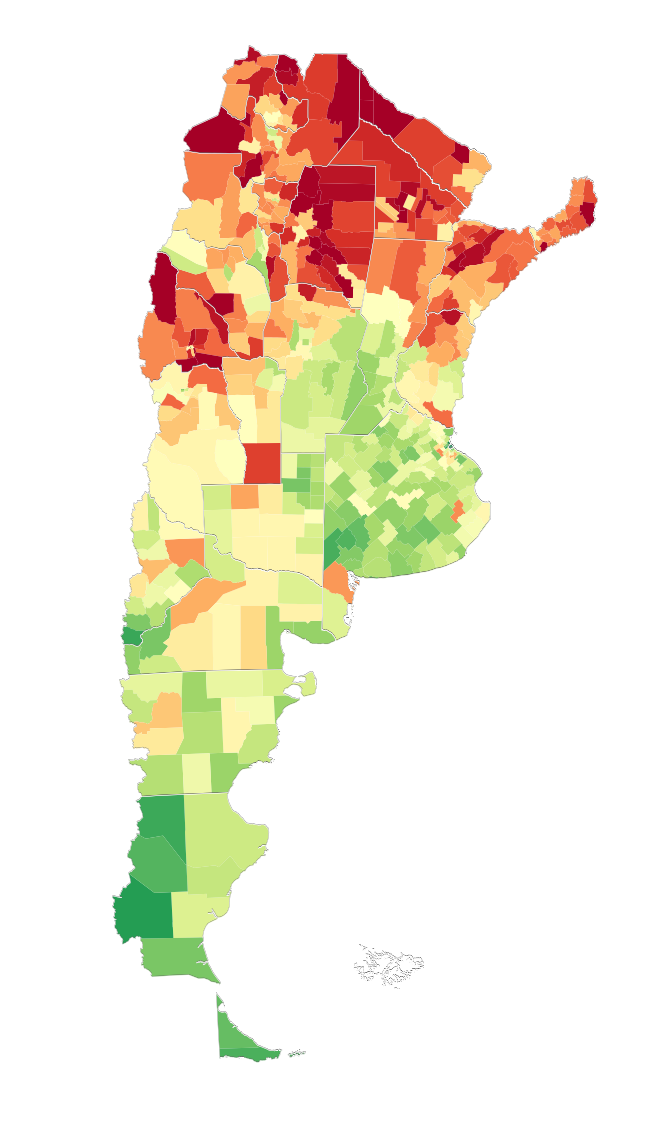

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

fig, ax = plt.subplots(1, figsize = (12, 20))
gdf.fillna(0).plot(column = 'Pobreza', ax = ax, vmin = .1, vmax = .65, cmap = 'RdYlGn_r', lw = 0)

provs_gdf.translate(yoff = 2200, xoff = 300).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
provs_gdf.translate().plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)

# # Encuadre ARG
ax.set_xlim(-.75e6, 1.25e6)
ax.set_ylim(-2.3e6, 1.6e6)
# ax.set_xlim(-8300000, -5750000)
# ax.set_ylim(-7450000, -2400000)
plt.axis('off')
plt.show()

### Porcentaje de personas en pobreza por fraccion censal.
#### Ejido Urbano AMBA

# Dependencia Temporal

In [57]:
# df = pd.read_csv('./../data/cuadro_AGLO_si_Q_pct', index_col=[0, 1], header = [0, 1]).unstack(0, 1)
# df.index = pd.DatetimeIndex(df.index, freq = 'Q')

# df_ = df[['Indigencia', 'Pobreza']].groupby(pd.Grouper(level = 0, freq = '6MS')).mean().T
# df_.index = pd.MultiIndex.from_tuples([(x[0], x[1], 'Aglomerados' if x[2] else 'Resto') for x in df_.index])
# show = df_.copy()
# show.columns = show.columns.to_period("6M")
# show

### Porcentajes, 10 provincias. (2018)

In [66]:
cuadro2 = pd.read_csv('./../data/cuadro1_'+str(frac)+'_ARG', index_col=[0, 1], header = [0, 1, 2])
df = cuadro2.iloc[:, cuadro2.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro2.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro2.columns.get_level_values(1).isin(['mean'])]

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.loc['2018'].mean().unstack([3, 1])
# x.columns = ['Fuera de aglomerados', 'Aglomerados']

# myround(x, 20).astype(int)
x.columns = x.columns.droplevel(1)
display(x.T.reindex(x.T.sum(1).sort_values(ascending = False).index).round(1))

# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

Indigencia          Pobreza         
                                   Hogares Personas Hogares Personas
NOMPROV                                                             
Santiago del Estero                   12.8     16.1    39.2     48.6
Formosa                               13.5     16.6    38.1     46.8
Chaco                                 13.1     16.5    37.3     46.5
Misiones                              11.8     15.3    35.3     45.0
Corrientes                            11.9     15.5    34.5     44.6
Salta                                 11.5     14.2    35.4     43.9
San Juan                               9.3     11.1    34.1     40.8
Tucuman                                9.6     11.2    32.1     39.3
Jujuy                                  9.1     10.5    32.4     40.1
Catamarca                              8.6     10.5    30.9     39.3
La Rioja                               6.9      8.4    31.4     38.8
Entre Rios                             7.2      9.8    26.4     35.4
San Luis                               6.0      8.2    26.6     35.2
Mendoza                                5.5      7.0    25.5     33.0
Santa Fe                               6.1      8.3    22.0     30.0
Cordoba                                5.1      6.7    21.8     29.6
Buenos Aires                           5.2      6.8    21.6     28.4
La Pampa                               5.3      7.5    19.1     27.0
Neuquen                                5.3      6.5    19.9     25.0
Chubut                                 4.6      5.8    18.8     25.0
Santa Cruz                             3.0      3.7    17.4     22.8
Tierra del Fuego                       2.6      2.0    10.7     12.0
Ciudad Autonoma de Buenos Aires        2.5      2.8     8.5     11.6
Rio Negro                              NaN      NaN     NaN      NaN

In [59]:
# # Niveles
# show = df.groupby(pd.TimeGrouper('Y', level = 0)).mean()
# show.columns = show.columns.droplevel(1)
# show.index = range(2007, 2019)

In [60]:
# diferencia
show = df.diff(4).groupby(pd.TimeGrouper('Y', level = 0)).mean()
show.columns = show.columns.droplevel(1)
show.columns = show.columns.swaplevel(0, 2).swaplevel(1,2)
show.index = range(startyr, endyr)

choice = np.random.choice(show.columns.get_level_values('NOMPROV').unique(), 10)

show.T.loc[choice].sort_index().round(1).style.applymap(color_negative_red)

## Niveles (%)
### Por Region y aglomerado. Promedio 2018.

In [61]:
cuadro = pd.read_csv('./../data/cuadro0_'+str(frac)+'_ARG', index_col=[0, 1, 2], header = [0, 1, 2])
df = cuadro.iloc[:, cuadro.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro.columns.get_level_values(1).isin(['mean'])]

# Leave just time as index
df = df.unstack([1, 2]).dropna(1)
df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.loc['2018'].mean().unstack([3, 4, 1]).dropna(1)
# # x.columns = ['Fuera de aglomerados', 'Aglomerados']
# # myround(x, 20).astype(int)
x.columns = x.columns.droplevel(-1)
display(x.T.reindex(x.T.sum(1).sort_values(ascending = False).index).round(1))

# # Rolling 4 trimestres de interpolado
# df = df.resample('Q').mean().interpolate()

Indigencia          Pobreza         
                                        Hogares Personas Hogares Personas
Region            NOMAGLO                                                
Noroeste          Fuera de aglom.          13.7     16.8    42.0     51.5
Noreste           Fuera de aglom.          14.3     18.5    40.2     50.6
                  Formosa                  10.3     11.8    32.8     39.0
Cuyo              Fuera de aglom.           8.2     10.5    33.0     41.1
Noreste           Resistencia               9.1     11.2    29.0     36.5
Noroeste          Sgo del Estero            7.9      9.4    29.9     37.3
Noreste           Corrientes                9.1     11.6    27.4     36.1
Cuyo              San Juan                  6.8      8.0    28.6     35.5
Noreste           Posadas                   8.0     10.1    26.1     34.2
Noroeste          Salta                     7.9      9.2    26.8     33.1
Cuyo              La Rioja                  5.5      6.3    27.9     34.1
Noroeste          Jujuy                     7.1      7.7    25.5     31.6
                  Tucuman                   7.1      8.5    25.1     31.3
                  Catamarca                 6.3      7.5    25.0     32.3
Cuyo              San Luis                  5.1      7.1    24.5     32.8
Pampeana          Santa Fe                  6.8      9.1    22.8     30.7
                  Fuera de aglom.           5.7      7.8    22.3     30.6
Gran Buenos Aires GBA                       5.6      7.0    23.1     29.6
Pampeana          San Nicolas               4.4      5.8    22.8     30.9
Cuyo              Mendoza                   4.5      5.7    21.9     29.2
Patagónica        Fuera de aglom.           5.1      6.5    21.5     28.0
Pampeana          Cordoba                   5.0      6.4    20.8     27.7
                  Rosario                   5.2      6.8    19.5     26.3
                  Parana                    4.5      5.8    20.0     26.1
                  Santa Rosa                5.2      7.3    17.8     25.2
Patagónica        Neuquen                   4.8      5.7    17.6     22.0
Pampeana          La Plata                  4.3      5.7    16.4     22.9
Patagónica        Rawson-Trelew             3.8      4.8    16.8     22.6
Pampeana          Bahia Blanca              3.9      5.4    15.4     21.6
                  Mar del Plata             3.8      5.0    15.8     21.5
Patagónica        Cdro Rivadavia            3.7      4.6    16.0     21.0
                  Rio Gallegos              2.2      2.5    14.3     18.7
                  Ushuaia-Rio Grande        2.6      2.0    10.7     12.0
Gran Buenos Aires CABA                      2.5      2.8     8.5     11.6

## Cambio en niveles (%)
### Por aglomerado en regiones.

In [62]:
# diferencia
show = df.diff(4).groupby(pd.TimeGrouper('Y', level = 0)).mean()
show.columns = show.columns.droplevel(1)
show.columns = show.columns.swaplevel(0,2).swaplevel(1,3)
show.index = range(startyr, endyr)

# choice = np.random.choice(, 10)
show = show.T.sort_index().round()

for region in show.index.get_level_values('Region').unique():
    display(md('#### '+region))
    display(show.loc[region].style.applymap(color_negative_red))

#### Cuyo

#### Gran Buenos Aires

#### Noreste

#### Noroeste

#### Pampeana

#### Patagónica

## Niveles (%)
### Partidos y Comunas del AMBA (muestreo)

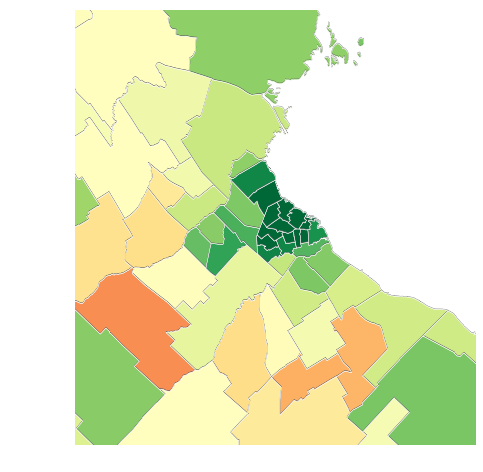

Indigencia          Pobreza         
                       Hogares Personas Hogares Personas
Florencio Varela          10.0     12.2    36.2     43.6
José C. Paz                8.5     10.0    32.9     39.8
Moreno                     8.4     10.4    32.2     39.5
Ezeiza                     7.3      9.1    30.7     37.5
Merlo                      7.2      8.6    29.2     36.2
Malvinas Argentinas        6.8      8.1    27.5     33.2
Esteban Echeverría         6.7      8.1    26.4     32.6
La Matanza                 6.3      7.7    26.5     32.7
Almirante Brown            5.7      7.3    25.3     32.2
Comuna 08                  6.6      7.6    23.6     30.3
Berazategui                5.6      7.1    24.0     30.9
Ensenada                   5.7      8.0    21.9     32.0
San Miguel                 6.0      7.1    24.0     30.0
Quilmes                    5.4      7.2    22.3     30.2
Tigre                      5.6      6.7    23.7     28.8
Lomas de Zamora            5.6      6.5    22.8     28.0
Berisso                    4.4      5.7    20.2     27.4
San Fernando               5.0      6.1    18.4     24.2
General San Martín         3.8      4.7    17.2     23.2
Hurlingham                 3.6      4.3    17.5     22.7
Avellaneda                 4.1      5.0    16.4     22.3
La Plata                   4.2      5.4    15.5     21.4
Lanús                      3.4      4.2    16.6     21.7
Comuna 04                  3.6      4.4    15.4     20.7
Tres de Febrero            3.1      4.0    13.3     17.9
Ituzaingó                  2.7      2.9    14.4     17.3
Morón                      2.6      3.7    12.4     17.0
Comuna 01                  3.9      4.2    11.8     15.6
Comuna 07                  3.1      3.9    11.3     16.0
Comuna 09                  2.6      3.3    10.8     14.3
San Isidro                 2.0      2.3    10.6     14.2
Comuna 03                  2.6      2.6     7.6     10.0
Comuna 10                  2.0      2.1     7.7      9.3
Comuna 15                  1.9      1.9     6.5      8.7
Vicente López              1.4      1.4     7.1      8.6
Comuna 02                  3.0      2.7     6.2      6.5
Comuna 14                  2.6      2.1     5.6      6.3
Comuna 06                  2.0      2.0     5.5      6.7
Comuna 12                  1.1      1.1     5.7      7.3
Comuna 11                  0.9      0.8     5.6      7.6
Comuna 05                  1.3      1.6     4.8      6.9
Comuna 13                  1.2      1.1     4.1      5.0
Escobar                    NaN      NaN     NaN      NaN
San Vicente                NaN      NaN     NaN      NaN
General Rodríguez          NaN      NaN     NaN      NaN
Marcos Paz                 NaN      NaN     NaN      NaN
Presidente Perón           NaN      NaN     NaN      NaN
Pilar                      NaN      NaN     NaN      NaN

In [63]:
fig, ax = plt.subplots(1, figsize = (8, 8))
gdf.fillna(0).plot(column = 'Pobreza', ax = ax, vmin = .1, vmax = .65, cmap = 'RdYlGn_r',
                                                 edgecolor = '.4', lw = 0)
#Partidos b&n
gdf.to_crs({'init': 'epsg:3395'}).fillna(0).plot(column = 'Pobreza', ax = ax, vmin = .1, vmax = .65, cmap = 'RdYlGn_r',
                                                 edgecolor = '.4', lw = 0)
dptos_gdf.to_crs({'init': 'epsg:3395'}).loc[dptos_gdf.to_crs({'init': 'epsg:3395'}).codpcia.isin(['02', '06'])].translate(yoff = 220, xoff = 30).plot(color = 'None', edgecolor = '.4', lw = .4, ax = ax, zorder = 10)
dptos_gdf.to_crs({'init': 'epsg:3395'}).loc[dptos_gdf.to_crs({'init': 'epsg:3395'}).codpcia.isin(['02', '06'])].translate(yoff = 0, xoff = 0).plot(color = 'None', edgecolor = 'w', lw = .4, ax = ax, zorder = 10)

# Encuadre GBA
plt.xlim(-6570000, -6450000)
plt.ylim(-4150000, -4020000)
# ax.set_xlim(530e5, 7e5)
# ax.set_ylim(-25000, 75000)
plt.axis('off')

plt.show()


cuadro = pd.read_csv('./../data/cuadro5_'+str(frac)+'_AMBA', index_col=[0, 1], header = [0, 1, 2])
df = cuadro.iloc[:, cuadro.columns.get_level_values(0).isin(['Indigencia', 'Pobreza'])
            & cuadro.columns.get_level_values(2).isin(['Hogares', 'Personas'])
                 & cuadro.columns.get_level_values(1).isin(['mean'])]

# Dptos de codigo a nombres...
dptos = pd.read_csv('./../data/radio_ref.csv')[['DPTO','NOMDPTO']].drop_duplicates().set_index('DPTO')
nomdptos = dptos.to_dict()['NOMDPTO']
df.index = pd.MultiIndex.from_tuples([(x[0], nomdptos[x[1]]) for x in df.index])

# Leave just time as index
df = df.unstack()

df.index = pd.DatetimeIndex(df.index)

# Ultimo periodo
x = df.loc['2018'].mean().unstack([3, 1])
# x.columns = ['Fuera de aglomerados', 'Aglomerados']

# myround(x, 20).astype(int)
x.columns = x.columns.droplevel(1)
display(x.T.reindex(x.T.sum(1).sort_values(ascending = False).index).round(1))

# Rolling 4 trimestres de interpolado
df = df.resample('Q').mean().interpolate()

## Cambio en niveles (%)

In [64]:
# diferencia
show = df.diff(4).groupby(pd.TimeGrouper('Y', level = 0)).mean()
show.columns = show.columns.droplevel(1)
show.columns = show.columns.swaplevel(0, 2).swaplevel(1,2)
show.index = range(startyr, endyr)

choice = np.random.choice(show.columns.get_level_values(0).unique(), 10)

show.T.loc[choice].sort_index().round(1).style.applymap(color_negative_red)

## Lista de Aglomerados
Y su poblacion (miles)

In [65]:
## Appendix
data = pd.read_csv('./../data/pobreza'+str(frac)+'.csv', usecols = ['DPTO', 'PERSONA_REF_ID', 'AGLOMERADO'])

aglo_labels = pd.read_csv('./../data/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
radio_ref = pd.read_csv('./../data/radio_ref.csv').merge(aglo_labels)
data = data.merge(radio_ref[['DPTO','NOMAGLO', 'NOMPROV', 'NOMDPTO']].drop_duplicates())

pd.options.display.max_rows = 999
poblacion_por_aglo_dpto = data.loc[data.AGLOMERADO != 0].groupby(['NOMAGLO', 'NOMPROV', 'NOMDPTO'])[['PERSONA_REF_ID']].count().sort_index()/frac/yrs_pob_data/1e3
poblacion_por_aglo_dpto.columns = ['Poblacion (miles)']
poblacion_por_aglo_dpto.drop('Fuera de aglom.').round().style.bar(vmin = 0)

# poblacion (miles)